dataset - https://www.kaggle.com/datasets/harikrishnareddyb/used-car-price-predictions/data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [5]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


We can see that the mean > median so our data has skew to the left.

Also std is fit in 50% of iqr and kurtosis will be high

<Axes: >

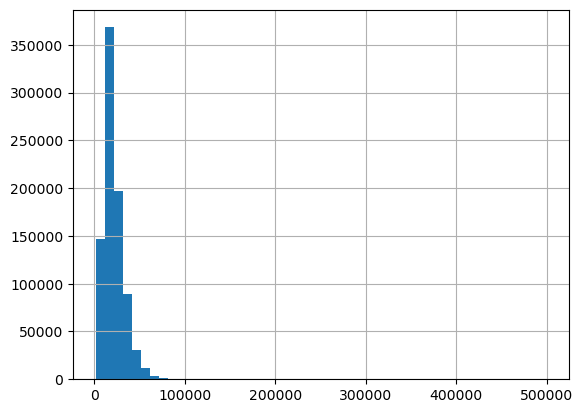

In [6]:
df['Price'].hist(bins=50)

<Axes: >

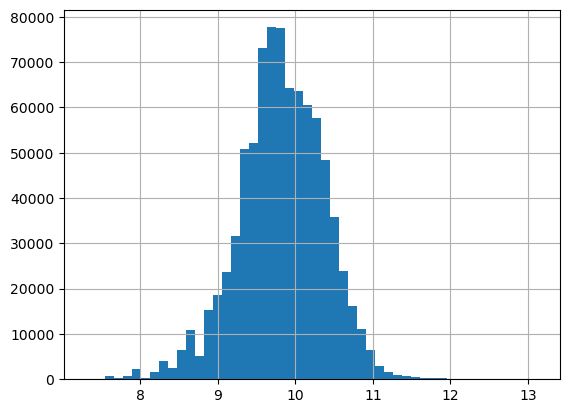

In [7]:
import numpy as np

np.log(df['Price']).hist(bins=50)

What does taking the logarithm give us?
    * Mean distance decreases
    * Standard deviation does too    

In [8]:
# identifying categorical columns
for col in df.columns:
    print(f'Predictor: {col}\nUnique variables: {df[col].sort_values().unique()}')

Predictor: Price
Unique variables: [  1500   1511   1527 ... 469991 490000 499500]
Predictor: Year
Unique variables: [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]
Predictor: Mileage
Unique variables: [      5       6       7 ... 2137327 2457832 2856196]
Predictor: City
Unique variables: ['AKRON' 'ALEXANDRIA' 'AURORA' ... 'phoenix' 'salt lake' 'victorville']
Predictor: State
Unique variables: [' AK' ' AL' ' AR' ' AZ' ' Az' ' CA' ' CO' ' CT' ' Ca' ' DC' ' DE' ' FL'
 ' Fl' ' GA' ' Ga' ' HI' ' IA' ' ID' ' IL' ' IN' ' KS' ' KY' ' LA' ' MA'
 ' MD' ' ME' ' MI' ' MN' ' MO' ' MS' ' MT' ' Md' ' NC' ' ND' ' NE' ' NH'
 ' NJ' ' NM' ' NV' ' NY' ' OH' ' OK' ' OR' ' Oh' ' PA' ' RI' ' SC' ' SD'
 ' TN' ' TX' ' UT' ' VA' ' VT' ' Va' ' WA' ' WI' ' WV' ' WY' ' ga']
Predictor: Vin
Unique variables: ['04WT3N56GG0646582' '04WT3N59GG1261202' '137FA84322E198163' ...
 'ZN661YUS7HX230573' 'ZN661YUS8HX230520' 'ZN661YUS9HX226976']
Predictor: Make
Un

In [9]:
# column Make can be used as categorical value
df['Make'].value_counts()

Make
Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab       

### bmw pred

In [10]:
df['NumOfYears'] = 2018 - df['Year'] # 2018 since the dataset was gathered that year
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,4
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,5
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,5
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,4
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,2


In [11]:
df['Make'].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
bmw_models = df[df['Make'] == 'BMW']['Model'].value_counts()[:34].index
bmw_models # filtered only those models that have >= 44 records

Index(['3', '5', '4', 'X3xDrive28i', '7', 'X5xDrive35i', 'X5AWD', '6',
       'X1xDrive28i', 'i3Hatchback', 'X3AWD', '2', 'X1sDrive28i', '1',
       'X3sDrive28i', 'X3xDrive35i', 'X5xDrive50i', 'X5sDrive35i',
       'X5xDrive35d', 'X6xDrive35i', 'X1Sports', 'X4xDrive28i', 'X1xDrive35i',
       'Z4Roadster', 'X6AWD', 'Z42dr', 'M32dr', 'Z4sDrive28i', 'X1xDrive',
       'Z4sDrive35i', 'M5Sedan', 'X5', 'M4Coupe', 'X3xDrive28d'],
      dtype='object', name='Model')

In [ ]:
bmw_df = df[(df['Make'] == 'BMW') & (df['Model'].isin(bmw_models))]
bmw_df

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears
24246,10995,2011,10000,SPRING VALLEY,CA,WBAPH5G52BNM82026,BMW,3,7
24247,14299,2014,25858,Las Vegas,NV,WBA3B1G58ENS77078,BMW,3,4
24248,11988,2011,30000,Duluth,GA,WBAPK7C57BF087014,BMW,3,7
24249,10999,2011,45078,Miami Gardens,FL,WBAPH7C56BE674180,BMW,3,7
24250,5991,2008,80185,Hollywood,FL,WBAVB77568NH78036,BMW,3,10
...,...,...,...,...,...,...,...,...,...
56656,54995,2014,23964,Honolulu,HI,WBAYP1C5XED216236,BMW,6,4
56657,39900,2014,33337,Hollywood,FL,WBALW3C52EC892808,BMW,6,4
56658,58621,2017,3040,Athens,GA,WBA4U7C3XH5H20134,BMW,4,1
56659,58000,2015,11835,Louisville,KY,WBA6B4C52FD760545,BMW,6,3


In [14]:
bmw_df['Model'].value_counts()

Model
3              11131
5               5348
4               2404
X3xDrive28i     1615
7               1460
X5xDrive35i     1237
X5AWD           1220
6                947
X1xDrive28i      757
i3Hatchback      660
X3AWD            557
2                543
X1sDrive28i      465
1                437
X3sDrive28i      397
X3xDrive35i      347
X5xDrive50i      334
X5sDrive35i      275
X5xDrive35d      257
X6xDrive35i      216
X1Sports         185
X4xDrive28i      144
X1xDrive35i      140
Z4Roadster       138
X6AWD            134
Z42dr            119
M32dr            103
Z4sDrive28i       91
X1xDrive          77
Z4sDrive35i       58
M5Sedan           56
X5                51
X3xDrive28d       44
M4Coupe           44
Name: count, dtype: int64

In [ ]:
# one hot encoding for categorical Model column
pd.get_dummies(bmw_df['Model']).replace(False, 0).replace(True, 1)

/var/folders/vm/vtmtqflj1t5013jv0rkg7jd40000gn/T/ipykernel_24310/2310054241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.get_dummies(bmw_df['Model']).replace(False, 0).replace(True, 1)


,1,2,3,4,5,6,7,M32dr,M4Coupe,M5Sedan,...,X5xDrive35d,X5xDrive35i,X5xDrive50i,X6AWD,X6xDrive35i,Z42dr,Z4Roadster,Z4sDrive28i,Z4sDrive35i,i3Hatchback
24246,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24247,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24248,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24249,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24250,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56657,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56658,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56659,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = bmw_df[['NumOfYears', 'Mileage']]
y = bmw_df['Price']
X

,NumOfYears,Mileage
24246,7,10000
24247,4,25858
24248,7,30000
24249,7,45078
24250,10,80185
...,...,...
56656,4,23964
56657,4,33337
56658,1,3040
56659,3,11835


In [20]:
X = sm.add_constant(X)
X

,const,NumOfYears,Mileage
24246,1.0,7,10000
24247,1.0,4,25858
24248,1.0,7,30000
24249,1.0,7,45078
24250,1.0,10,80185
...,...,...,...
56656,1.0,4,23964
56657,1.0,4,33337
56658,1.0,1,3040
56659,1.0,3,11835


In [21]:
# creating model 
model = sm.regression.linear_model.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 2.767e+04
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:33:32   Log-Likelihood:            -3.2890e+05
No. Observations:               31991   AIC:                         6.578e+05
Df Residuals:                   31988   BIC:                         6.578e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.087e+04     72.180    566.165      0.0

In [22]:
X = sm.add_constant(X)

# Create OLS model
model = sm.regression.linear_model.OLS(np.log(y), X)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 5.287e+04
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:33:57   Log-Likelihood:                -587.16
No. Observations:               31991   AIC:                             1180.
Df Residuals:                   31988   BIC:                             1205.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7630      0.003   4270.981      0.0

ln(y)-lin(x): 
ln(y) = b0 + b1(X)

y changes to b1*100% when X changed 1

So in this case every 1 year added to car's age will result in the lose of 8% of its price